In [16]:
!pip install numpy
!pip install scipy
!pip install matplotlib


import numpy as np
# autoreload modules when code is running
%load_ext autoreload
%autoreload 2

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 12.4 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 4.7 MB/s  eta 0:00:01
     |████████████████████████████████| 90 kB 10.4 MB/s eta 0:00:01
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:

#1.1. Using values to define variables
money = 1 #m
v = 10 #v
ep = 0.3 #epsilon
tax0 = 0.4 #tau_0
tax1 = 0.1 #tau_1
kappa = 0.4 #kappa
w = 0.5 #w set with the initial value 0.5

In [24]:
#1.2. Defining utility as a function of labour supplu and consumption
def labour_utility(l,c,ep,v):
    u = np.log(c) - v*l**(1 + 1/ep)/(1 + 1/ep)
    return u

#1.3. Defining the budget constraint
def budget_constraint(money,w,l,tax0,tax1,kappa):
    budget = money + w*l - w*l*tax0 - tax1*max((w*l - kappa),0)
    return budget

In [25]:
from scipy import optimize

#1.4. Objective function returning negative utility, to minimize
def value_of_choice_budget(l,w,ep,v,tax0,tax1,kappa):
    c = budget_constraint(money,w,l,tax0,tax1,kappa)
    return -labour_utility(l,c,ep,v)

#1.5.1. Call the solver given the target from 1.4 and the constraint from 1.3.
def optimiser(w,ep,v,tax0,tax1,kappa,money):
    sol_case1 = optimize.minimize_scalar(
        value_of_choice_budget, method = 'bounded',
        bounds=(0,1), args = (w,ep,v,tax0,tax1,kappa))
    
#1.5.2. Unpack optimal labour supply, then return feasible consumption and implied individual utility
    lstar = sol_case1.x
    cstar = budget_constraint(money,w,lstar,ltax,ttax,cutoff)
    ustar = labour_utility(lstar,cstar,frisch,v)
    return [lstar,cstar,ustar]

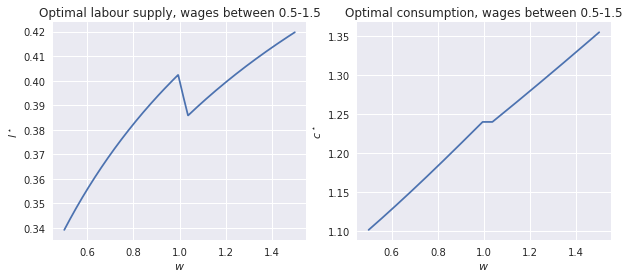

In [28]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

#2.1. Set number of observations
N=1000

#2.2.1. Generate vectors of optimal labour supply and feasible consumption given wage.
w_vec=np.linspace(0.5,1.5,N)
l_vec=np.empty(N)
c_vec=np.empty(N)
for i,w in enumerate(w_vec):
    l_c_bundle=optimiser(w,ep,v,tax0,tax1,kappa,money)
    #2.2.2. As the optimiser function returns a list of optimal labour supply and feasible consumption,
            #extract the relevant results. Copy them to the list of labour supply and consupmtion.
    l_vec[i]=l_c_bundle[0]
    c_vec[i]=l_c_bundle[1]

#2.3.1 Create the figure
fig = plt.figure(figsize=(10,4))

#2.3.2. Left plot; labour supply
ax_left = fig.add_subplot(1,2,1)
ax_left.plot(w_vec,l_vec)

ax_left.set_title('Optimal labour supply, wages between 0.5-1.5')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

#2.3.3. right plot; feasible consumption
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(w_vec,c_vec)

ax_right.set_title('Optimal consumption, wages between 0.5-1.5')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)